<a href="https://colab.research.google.com/github/smaurya755/Predicting-Alexa-Feedback/blob/main/Amazonalexa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import nltk
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import re 
nltk.download('wordnet')
from nltk import WordNetLemmatizer
from nltk import PorterStemmer
from nltk.corpus import stopwords
sns.set_style("darkgrid")
#Loading the dataframe 
df = pd.read_csv("amazon_alexa.tsv", sep='\t')
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [67]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


Here we can see only less than 25% ratings are below 4.Most ratings are between 4-5, most feedbacks are positive.At least 50% customers have rated 5 ratings. 

In [68]:
df.groupby(['feedback']).sum()

,rating
feedback,
0,353
1,13706


In [69]:
#Checking none values 
df.isnull().any().sum()

0

In [70]:
#Count of positive and negative feedbacks 
df.feedback.value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [71]:
#Describing ratings 
df.groupby('rating').describe()

feedback                                   
          count mean  std  min  25%  50%  75%  max
rating                                            
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


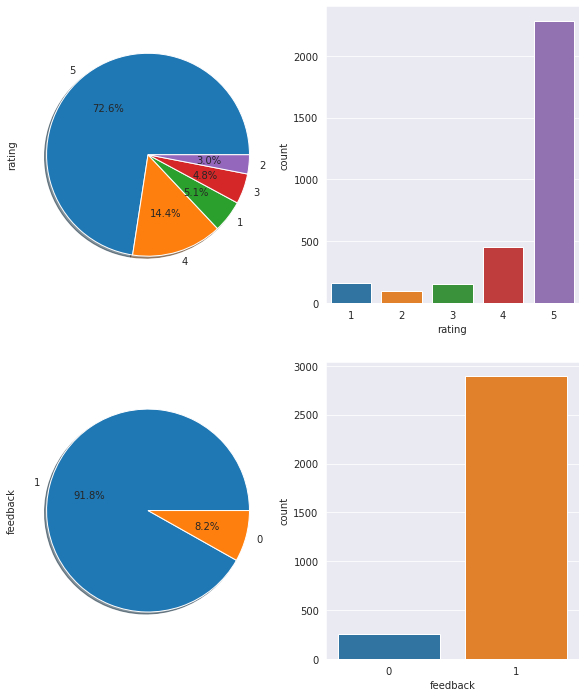

In [72]:
#Explore Categorical Variables
cat_col = ['rating','feedback']

plt.figure(figsize=(10, 12))
count = 1
for cols in cat_col:
    plt.subplot(2, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%')
    count +=1
    plt.subplot(2, 2, count)
    sns.countplot(cols, data=df)
    count+=1

We can observe that most reviews are positive and a very high percentage of 72.6% reviews are rated 5.Majority customers are happy.

In [73]:
df.rating.value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

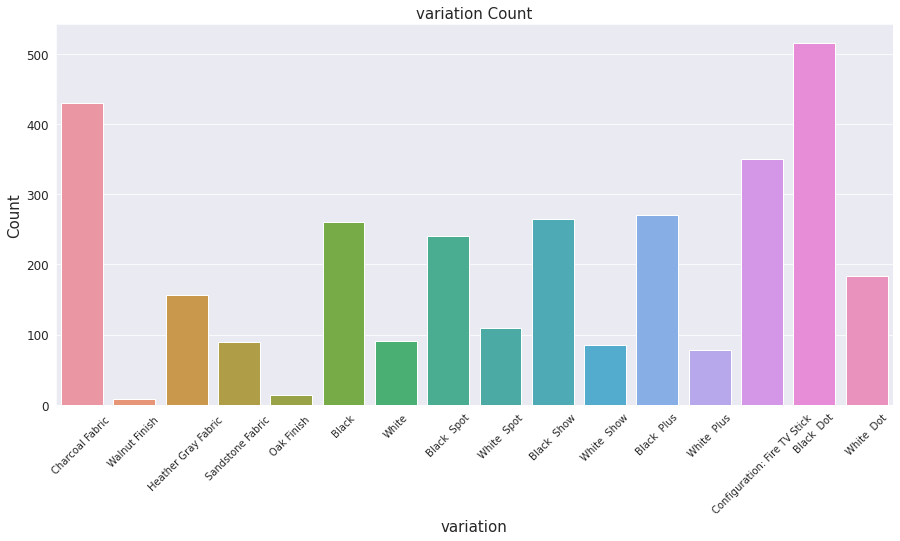

In [74]:
#Plotting Variation
plt.figure(figsize=(15,7))
sns.countplot(x='variation', data=df)
plt.xlabel("variation", fontsize=15) #seting the xtitle and size
plt.ylabel("Count", fontsize=15) # Seting the ytitle and size
plt.title("variation Count", fontsize=15) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.xticks(rotation=45)
plt.show()

Most popular variation is Black Dot and least popular is walnut finish

In [75]:
stemmizer = PorterStemmer()

In [76]:
lemmatizer = WordNetLemmatizer()

In [77]:

corpus = [ ]
for i in range(len(df['verified_reviews'])):
  review = re.sub('[^a-zA-Z]', ' ', df['verified_reviews'][i])
  review = review.lower()
  review = review.split()
  review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
  review = " ".join(review)
  corpus.append(review)


In [78]:
corpus

['love echo',
 'loved',
 'sometimes playing game answer question correctly alexa say got wrong answer like able turn light away home',
 'lot fun thing yr old learns dinosaur control light play game like category nice sound playing music well',
 'music',
 'received echo gift needed another bluetooth something play music easily accessible found smart speaker wait see else',
 'without cellphone cannot use many feature ipad see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep fun ask random question hear response seem smartbon politics yet',
 'think th one purchased working getting one every room house really like feature offer specifily playing music echo controlling light throughout house',
 'look great',
 'love listened song heard since childhood get news weather information great',
 'sent year old dad talk constantly',
 'love learning knew thing eveyday still figuring everything work far easy use understand make laugh time',
 'purchased mother knee prob

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1500)
X = cv.fit_transform(corpus).toarray()
y = df['feedback']

In [80]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 )

###Naive Bayes Model 

In [82]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [83]:
y_pred=spam_detect_model.predict(X_test)


              precision    recall  f1-score   support

           0       0.29      0.93      0.44        15
           1       1.00      0.94      0.97       615

    accuracy                           0.94       630
   macro avg       0.64      0.94      0.71       630
weighted avg       0.98      0.94      0.96       630



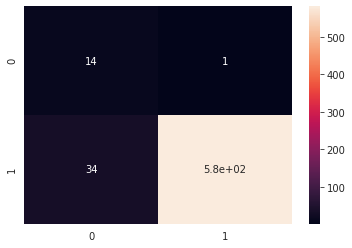

In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
sns.heatmap(confusion_matrix(y_pred, y_test), annot = True)
accuracy_score(y_pred, y_test)


###Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

0.9444444444444444

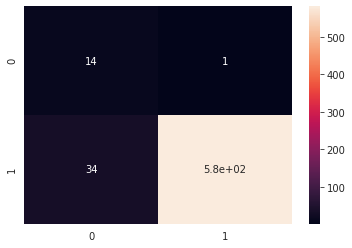

In [86]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
sns.heatmap(confusion_matrix(y_pred, y_test), annot = True)
accuracy_score(y_pred, y_test)

In [87]:
print(cv.get_feature_names())

['ability', 'able', 'absolutely', 'accent', 'access', 'account', 'across', 'act', 'activated', 'actually', 'ad', 'adapter', 'add', 'added', 'addicted', 'adding', 'addition', 'additional', 'adequate', 'adjust', 'advanced', 'advantage', 'advertised', 'advertisement', 'advertising', 'advise', 'age', 'ago', 'ai', 'al', 'alarm', 'alert', 'alex', 'alexa', 'alexi', 'alexia', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'amazed', 'amazing', 'amazingly', 'amazon', 'american', 'amount', 'android', 'annoying', 'another', 'answer', 'answered', 'answering', 'anticipated', 'anymore', 'anyone', 'anypod', 'anything', 'anytime', 'anywhere', 'apartment', 'app', 'apparently', 'appear', 'appears', 'apple', 'appliance', 'application', 'appointment', 'apps', 'area', 'arlo', 'around', 'arrived', 'artist', 'ask', 'asked', 'asking', 'asleep', 'aspect', 'assist', 'assistant', 'attached', 'attempt', 'attention', 'attractive', 'audible', 'audio', 'audiobook', 'audiophile

In [88]:
from sklearn.metrics import precision_score
# calculate prediction
precision = precision_score(y_test, y_pred, average='binary')

In [89]:
from sklearn.metrics import recall_score
#calculate recall
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.998


In [91]:
from sklearn.metrics import f1_score
#Calculate F1 score
score = f1_score(y_test, y_pred, average='binary')

In [92]:
print(precision, score)

0.9447154471544715 0.9707602339181286


Random forest Model gives a very good accuracy for and F1 score for predicting the sentiment for product reviews.